In [2]:
#library(car)
#scatterplotMatrix(cdata[,c("crmrte", "polpc", "prbarr", "prbconv", "prbpris")], diagonal = "histogram")
library(ggplot2)
library(GGally)
library(ggcorrplot)
library(ggpubr)
library(car)

Loading required package: magrittr
Loading required package: carData


### EDA

#### Import the data and look at the first six rows

In [3]:
data <- read.csv(file = 'crime_v2.csv')
head(data)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,...,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,...,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,...,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,...,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,...,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,...,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


#### Get summary of data and spot anomalies

In [4]:
summary(data)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

It seems every variable has 6 NA values. If those are across the rows, then the respective rows could be removed.

In [5]:
(new_data <- data[rowSums(is.na(data)) > 0,])

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


The assumption was right. Now, those rows could be safely deleted.

In [6]:
cdata <- data[!is.na(data$crmrte),]

A close look at the probability of convition variable shows a non-numeric value

In [9]:
cdata$prbconv <- as.numeric(gsub("[^0-9.]+", "", cdata$prbconv))

### Variable Selection

crime rate = number of crimes/population count <br>
If the population stays constant, crime rate has a linear relationship with number of crime. In addition, considering rates, instead of taking actual number, helps to standardize the values. <br>

Similar to crime rate, probability or ratio of arrest or convition or prison have linear relationship with arrest/conviction/prison.

pro of arr = arr/offenses <br>
pro of conv = conv/arr <br>
pro of prison = prison/convictions <br>

It means no transformation is necessary for these key variables.

Since the objective is the find out the of reason(s) behind higher crimes, the variable 'crmrte' should be the dependent variable. Now, before model building, it is important to understand the relationships between the dependent and possible independent variables.

### Analyze Dependent and Independent Variable

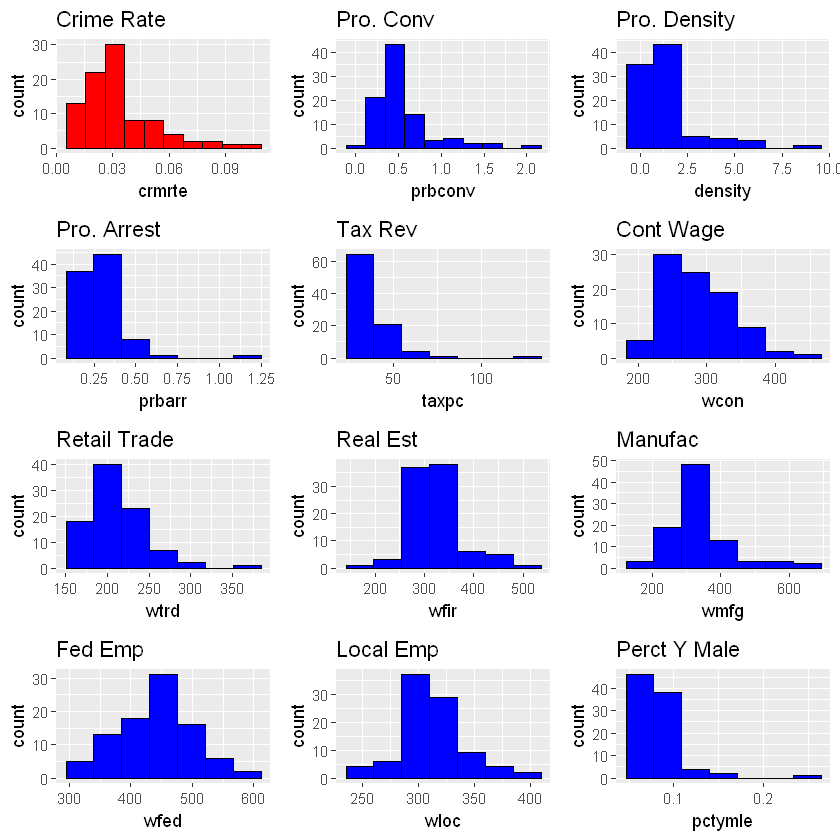

In [10]:
#hist(cdata$crmrte)

c <- ggplot(data=cdata, aes(crmrte)) +
    geom_histogram(bins=10, fill="red", color="black") + 
    ggtitle(paste("Crime Rate"))

cn <- ggplot(data=cdata, aes(prbconv)) +
    geom_histogram(bins=10, fill="blue", color="black") + 
    ggtitle(paste("Pro. Conv"))

dn <- ggplot(data=cdata, aes(density)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Pro. Density"))

ar <- ggplot(data=cdata, aes(prbarr)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Pro. Arrest"))

tp <- ggplot(data=cdata, aes(taxpc)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Tax Rev"))

wc <- ggplot(data=cdata, aes(wcon)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Cont Wage"))

wtr <- ggplot(data=cdata, aes(wtrd)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Retail Trade"))

wfr <- ggplot(data=cdata, aes(wfir)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Real Est"))

wmf <- ggplot(data=cdata, aes(wmfg)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Manufac"))

wfd <- ggplot(data=cdata, aes(wfed)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Fed Emp"))

wl <- ggplot(data=cdata, aes(wloc)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Local Emp"))

pct <- ggplot(data=cdata, aes(pctymle)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Perct Y Male"))

ggarrange(c, cn, dn, ar,tp, wc,wtr,wfr,wmf, wfd,wl, pct,
          ncol = 3, nrow = 4)

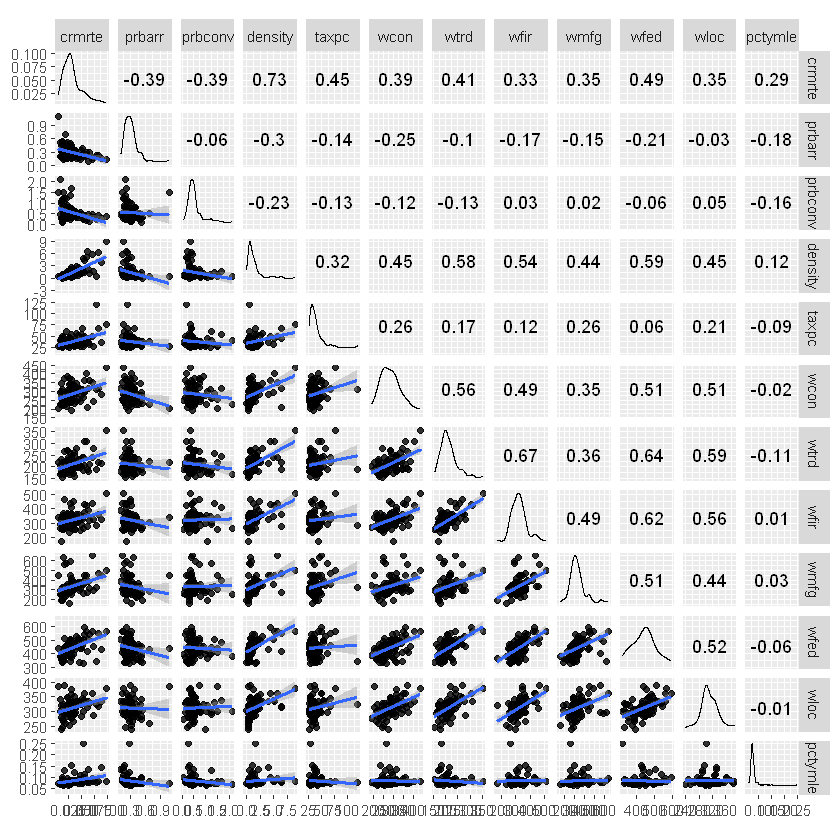

In [11]:
smoothing_method = "glm"
options(repr.plot.width=7, repr.plot.height=7)
ggscatmat(cdata[,c("crmrte", "prbarr", "prbconv", "density", "taxpc", "wcon", "wtrd", "wfir", "wmfg", "wfed", "wloc", "pctymle")], alpha=0.8) +
geom_smooth(method=smoothing_method)

Variables with weak relationship <br>

"mix", "wser", "polpc", "avgsen", "pctmin80", "wsta", "wtuc", "prbpris"

### Compare Corr for Different Transformation with Crime Rate

In [13]:
#tdata <- data.frame(matrix(ncol = 12, nrow = 0))
cols <- c("crmrte", "prbarr", "prbconv", "density", "taxpc", "wcon", "wtrd", "wfir", "wmfg", "wfed", "wloc", "pctymle")
#colnames(tdata) <- cols

#for(ops in c('', 'lg', 'sq', 'sqt')){
print('------------------Corr with Crime Rate. No trans of crmrte---------------------')
   
list_data <- list(cols, getLogTran(cdata, cols, 'lg', ''), 
                  getLogTran(cdata, cols, 'sq', ''), getLogTran(cdata, cols, 'sqt', ''), getLogTran(cdata, cols, '', ''))

tdata  <-  as.data.frame(matrix(unlist(list_data), nrow=length(unlist(list_data[1]))))
colnames(tdata) <- c("var", "lg", "sq", "sqt", "none")
tdata

print('------------------Corr with Crime Rate. Log trans of crmrte---------------------')

list_data <- list(cols, getLogTran(cdata, cols, 'lg', 'lg'), 
                  getLogTran(cdata, cols, 'sq', 'lg'), 
                  getLogTran(cdata, cols, 'sqt', 'lg'), 
                  getLogTran(cdata, cols, '', 'lg'))

tdata  <-  as.data.frame(matrix(unlist(list_data), nrow=length(unlist(list_data[1]))))
colnames(tdata) <- c("var", "lg", "sq", "sqt", "none")
tdata

print('------------------Corr with Crime Rate. Square Trans of crmrte---------------------')


list_data <- list(cols, getLogTran(cdata, cols, 'lg', 'sq'), 
                  getLogTran(cdata, cols, 'sq', 'sq'), 
                  getLogTran(cdata, cols, 'sqt', 'sq'), 
                  getLogTran(cdata, cols, '', 'sq'))

tdata  <-  as.data.frame(matrix(unlist(list_data), nrow=length(unlist(list_data[1]))))
colnames(tdata) <- c("var", "lg", "sq", "sqt", "none")
tdata

print('------------------Corr with Crime Rate. SQRT Trans of crmrte---------------------')


list_data <- list(cols, getLogTran(cdata, cols, 'lg', 'sqt'), 
                  getLogTran(cdata, cols, 'sq', 'sqt'), 
                  getLogTran(cdata, cols, 'sqt', 'sqt'), 
                  getLogTran(cdata, cols, '', 'sqt'))

tdata  <-  as.data.frame(matrix(unlist(list_data), nrow=length(unlist(list_data[1]))))
colnames(tdata) <- c("var", "lg", "sq", "sqt", "none")
tdata


[1] "------------------Corr with Crime Rate. No trans of crmrte---------------------"


var,lg,sq,sqt,none
crmrte,0.94155941652815,0.963314447688739,0.986585485007721,1
prbarr,-0.419822581643,-0.320465605575069,-0.413135695720821,-0.39332973735363
prbconv,-0.364752954240707,-0.331074792409666,-0.392246653034489,-0.385972361706137
density,0.477607761812432,0.660066274500242,0.733462985063669,0.728963158061984
taxpc,0.415564519823015,0.44182777372935,0.437572604049532,0.4509797818509
wcon,0.380299619445919,0.401694232842044,0.386622362460203,0.39229443535912
wtrd,0.392409116015411,0.426387026310302,0.401340429749109,0.410105585330591
wfir,0.312002710121516,0.343645836169541,0.321294225375552,0.329611989689664
wmfg,0.385690233607561,0.30668110576027,0.372896376265288,0.354288005359683
wfed,0.454605581290155,0.513671043937348,0.4708184473765,0.486155764564391


[1] "------------------Corr with Crime Rate. Log trans of crmrte---------------------"


var,lg,sq,sqt,none
crmrte,1,0.82581808440035,0.983402742416995,0.94155941652815
prbarr,-0.435195743819109,-0.452151351230834,-0.458583884866793,-0.47138133260688
prbconv,-0.37356092185561,-0.417717922888421,-0.429771715930372,-0.446880475459404
density,0.493596527034902,0.520974596124295,0.68110686628769,0.633650441803765
taxpc,0.341856418221085,0.344572481500381,0.354361129677032,0.360050785795018
wcon,0.394724824485736,0.388696387893254,0.394482240903476,0.393359273558206
wtrd,0.376303882931544,0.381697221655001,0.378583284428582,0.380309581524027
wfir,0.283247741273896,0.291556896045156,0.286255867938031,0.288595147782677
wmfg,0.355277481858017,0.251548771439684,0.334449726114465,0.308858712462574
wfed,0.498380105956656,0.537670713844459,0.51006063479592,0.520561570595515


[1] "------------------Corr with Crime Rate. Square Trans of crmrte---------------------"


var,lg,sq,sqt,none
crmrte,0.82581808440035,1,0.908891866329352,0.963314447688739
prbarr,-0.392307364320665,-0.244527052834584,-0.370774526245122,-0.336415556641826
prbconv,-0.332915289178236,-0.25677638647799,-0.340763624063169,-0.321304760441234
density,0.425754280086151,0.739296908890496,0.717924635162036,0.753822678425409
taxpc,0.453149701355062,0.494619036717848,0.48110566503104,0.499453249054686
wcon,0.35460902337128,0.397454418212015,0.365713604636538,0.376582703990497
wtrd,0.382995977431548,0.443658339208963,0.397963929150082,0.413232325590036
wfir,0.318935779686677,0.371969143290673,0.333598634129723,0.347279847367517
wmfg,0.373402608684893,0.325039917686523,0.369149193807379,0.358783456764925
wfed,0.380648994427888,0.448305156584695,0.398535168304697,0.41587540695076


[1] "------------------Corr with Crime Rate. SQRT Trans of crmrte---------------------"


var,lg,sq,sqt,none
crmrte,0.983402742416995,0.908891866329352,1,0.986585485007721
prbarr,-0.428853144818603,-0.377405751773552,-0.435035973884427,-0.4288556077934
prbconv,-0.372454606420181,-0.374409304618894,-0.413806497072104,-0.418305461834107
density,0.493488003542832,0.597989175801448,0.718591754803244,0.691747794431379
taxpc,0.382756178938766,0.398040449985126,0.400385015589278,0.410210182611733
wcon,0.390394399570365,0.398594517634809,0.393625604136896,0.396050357845887
wtrd,0.390039563747317,0.40918239775622,0.395545079473709,0.400667352070585
wfir,0.30169755492931,0.321352885331649,0.307822347873119,0.313086526634286
wmfg,0.378798047014416,0.284901790345843,0.361510635480353,0.338798716790089
wfed,0.484960991105009,0.535248201036715,0.499215922125637,0.512424244241738


### Model Creation

### Model 1


Call:
lm(formula = crmrte ~ density + pctymle + prbconv + prbarr + 
    taxpc, data = cdata)

Coefficients:
(Intercept)      density      pctymle      prbconv       prbarr        taxpc  
  0.0117589    0.0065177    0.1489191   -0.0115085   -0.0248206    0.0003545  



Call:
lm(formula = crmrte ~ density + pctymle + prbconv + prbarr + 
    taxpc, data = cdata)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.022522 -0.005880 -0.001674  0.004811  0.037774 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.176e-02  7.585e-03   1.550 0.124800    
density      6.518e-03  8.320e-04   7.834 1.22e-11 ***
pctymle      1.489e-01  4.996e-02   2.981 0.003750 ** 
prbconv     -1.151e-02  3.337e-03  -3.448 0.000879 ***
prbarr      -2.482e-02  8.775e-03  -2.829 0.005829 ** 
taxpc        3.545e-04  9.141e-05   3.878 0.000207 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01057 on 85 degrees of freedom
Multiple R-squared:  0.7017,	Adjusted R-squared:  0.6841 
F-statistic: 39.99 on 5 and 85 DF,  p-value: < 2.2e-16


[1] -561.9792

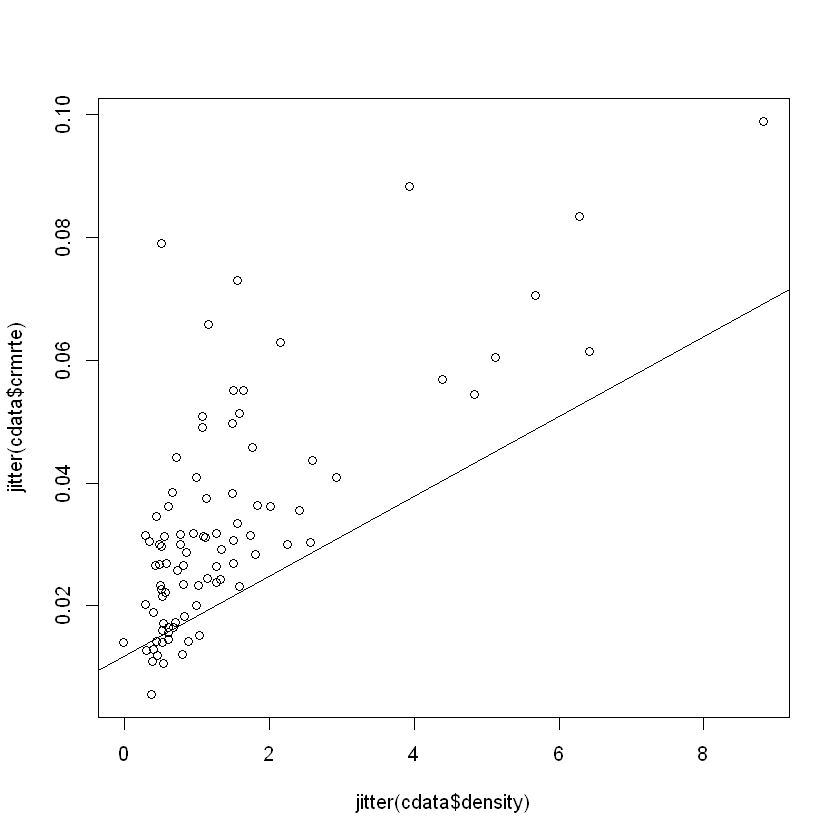

In [14]:
plot(jitter(cdata$density), jitter(cdata$crmrte))
(model1 <- lm(crmrte ~ density + pctymle + prbconv + prbarr + taxpc, data = cdata))
abline(model1)
summary(model1)
AIC(model1)

### residuals vs. leverage plot

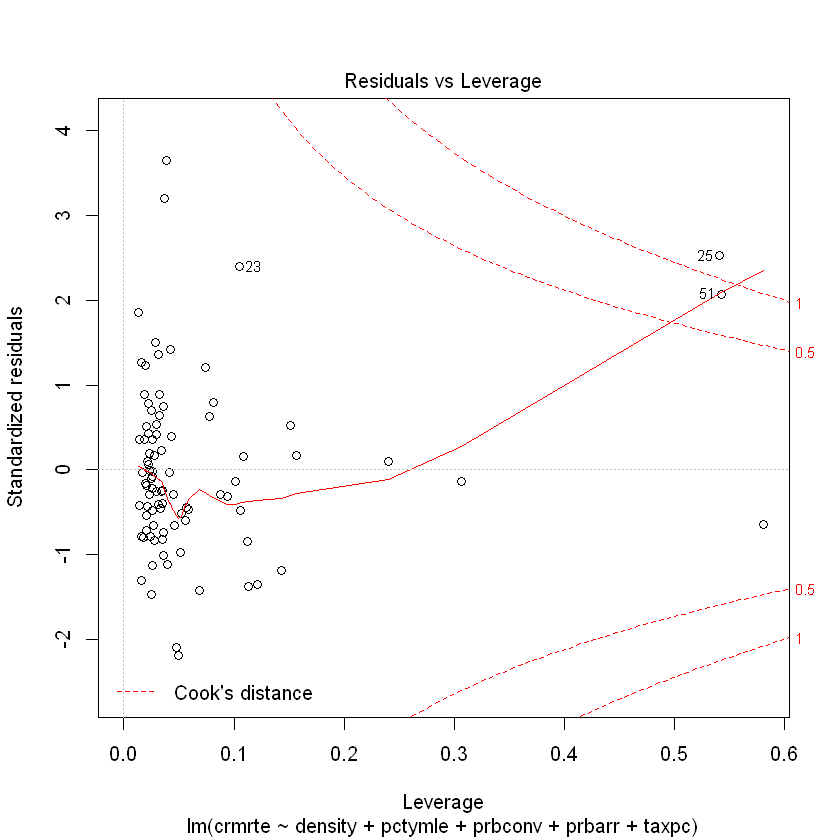

In [15]:
plot(model1, which = 5)

Cook's distance is more than 1. So, concern about outliers?

### Model2

#### TODO - Select tranformation according to the above table

In [16]:
#plot(jitter(cdata$prbconv), jitter(cdata$crmrte))
(model2 <- lm(crmrte ~ ., data = cdata))
#abline(model2)
summary(model2)
AIC(model2)


Call:
lm(formula = crmrte ~ ., data = cdata)

Coefficients:
(Intercept)       county         year       prbarr      prbconv      prbpris  
  1.393e-02    9.434e-06           NA   -5.124e-02   -1.876e-02    3.807e-03  
     avgsen        polpc      density        taxpc         west      central  
 -3.914e-04    6.868e+00    5.291e-03    1.668e-04   -2.664e-03   -4.189e-03  
      urban     pctmin80         wcon         wtuc         wtrd         wfir  
  2.688e-04    3.206e-04    2.131e-05    5.507e-06    2.710e-05   -3.492e-05  
       wser         wmfg         wfed         wsta         wloc          mix  
 -1.975e-06   -8.520e-06    3.032e-05   -2.450e-05    1.452e-05   -1.853e-02  
    pctymle  
  9.964e-02  



Call:
lm(formula = crmrte ~ ., data = cdata)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0169230 -0.0038296 -0.0005398  0.0044438  0.0220882 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.393e-02  1.946e-02   0.715 0.476851    
county       9.434e-06  1.578e-05   0.598 0.551903    
year                NA         NA      NA       NA    
prbarr      -5.124e-02  9.835e-03  -5.209 1.97e-06 ***
prbconv     -1.876e-02  3.764e-03  -4.983 4.66e-06 ***
prbpris      3.807e-03  1.198e-02   0.318 0.751626    
avgsen      -3.914e-04  4.098e-04  -0.955 0.343029    
polpc        6.868e+00  1.545e+00   4.445 3.39e-05 ***
density      5.291e-03  1.345e-03   3.932 0.000202 ***
taxpc        1.668e-04  9.587e-05   1.740 0.086412 .  
west        -2.664e-03  3.819e-03  -0.698 0.487852    
central     -4.189e-03  2.764e-03  -1.515 0.134356    
urban        2.688e-04  6.144e-03   0.044 0.965226    
pctm

[1] -592.1091

### Model 3

**Omitting Variables Bias**

The dependent variables influence each other and those positive or negative bias is captured by the error term. Now, assumption of the regressor states that the error term should not have significant correlation with the dependent variable.

**If the following condition satifies, it is safe to omit variable**

The condition E(ui|Xi)=0E(ui|Xi)=0 <br>
X is **Not** correlated with the omitted variable. <br> 
The omitted variable is **Not** a determinant of the dependent variable Y. 

In [17]:
(model3 = lm(crmrte ~ density + prbconv, data = cdata))
model3$coefficients
summary(model3)
AIC(model3)


Call:
lm(formula = crmrte ~ density + prbconv, data = cdata)

Coefficients:
(Intercept)      density      prbconv  
   0.028245     0.008399    -0.012418  


(Intercept)      density      prbconv 
 0.028245189  0.008398828 -0.012417520


Call:
lm(formula = crmrte ~ density + prbconv, data = cdata)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.017924 -0.008001 -0.002455  0.005180  0.049056 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0282452  0.0029586   9.547 3.07e-15 ***
density      0.0083988  0.0008783   9.563 2.84e-15 ***
prbconv     -0.0124175  0.0037761  -3.288  0.00145 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01229 on 88 degrees of freedom
Multiple R-squared:  0.5827,	Adjusted R-squared:  0.5732 
F-statistic: 61.43 on 2 and 88 DF,  p-value: < 2.2e-16


[1] -537.4258

In [28]:
library(stargazer)

stargazer(model1, model2, model3, type = "text", 
          report = "vc", # Don't report errors, since we haven't covered them
          title = "Linear Models of Crime Rates",
          keep.stat = c("rsq", "n"),
          omit.table.layout = "n") # Omit more output related to errors



Linear Models of Crime Rates
              Dependent variable:  
             ----------------------
                     crmrte        
              (1)     (2)     (3)  
-----------------------------------
county              0.00001        
                                   
year                               
                                   
density      0.007   0.005   0.008 
                                   
pctymle      0.149   0.100         
                                   
prbconv      -0.012  -0.019  -0.012
                                   
prbpris              0.004         
                                   
avgsen              -0.0004        
                                   
polpc                6.868         
                                   
prbarr       -0.025  -0.051        
                                   
taxpc        0.0004  0.0002        
                                   
west                 -0.003        
                                  

### Appendex

In [8]:
getLogTran <- function(df, cols, tranType, tranTypeDep){
    corList <- list()
    
    for(coln in cols){
               
        if(tranType == ''){
          corList <- append(corList, cor(df[[coln]], tranVar(df$crmrte, tranTypeDep)))   
            
        }else{
            
          newColN <- paste(coln, tranType, sep="_")
          df[[newColN]] <- tranVar(df[[coln]], tranType)    
          corList <- append(corList, cor(df[[newColN]], tranVar(df$crmrte, tranTypeDep)))              
      }        
        
    }
    
    return (corList)
}
    
tranVar <- function(var1, tranType){
    if(tranType == 'lg'){
        return (log(var1))
    } else if(tranType == 'sq'){
        return (var1^2)
    } else if(tranType == 'sqt'){
        return (sqrt(var1))
    } else {
        return (var1)
    }
}